In [15]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay)

In [16]:
final_merged_df = pd.read_csv('project_checkin_data.csv')

In [17]:
# univariate summary for TSLA Returns
tsla_return_summary = final_merged_df['TSLA_Return'].describe()
print(tsla_return_summary)

count    224.000000
mean       0.274891
std        2.967428
min      -12.789712
25%       -0.981000
50%        0.069047
75%        1.773101
max       10.753397
Name: TSLA_Return, dtype: float64


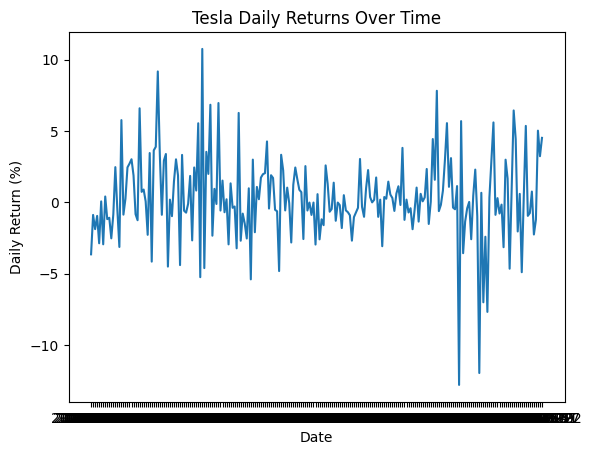

In [18]:
# Line plot of TSLA Returns
plt.plot(final_merged_df['Date'], final_merged_df['TSLA_Return'])
plt.title('Tesla Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

In [19]:
contingency_table = pd.crosstab(final_merged_df['TSLA_Return'], final_merged_df['change_in_followers'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Test p-value: {p_value: .4f}')

alpha = .05

if p_value <= alpha:
    print('Reject H0: The return is related to the change in Elon Musk\'s follower count.')
else:
    print('Fail to reject H0: The return is not related to the change in Elon Musk\'s follower count.')

Chi-Square Test p-value:  0.2394
Fail to reject H0: The return is not related to the change in Elon Musk's follower count.


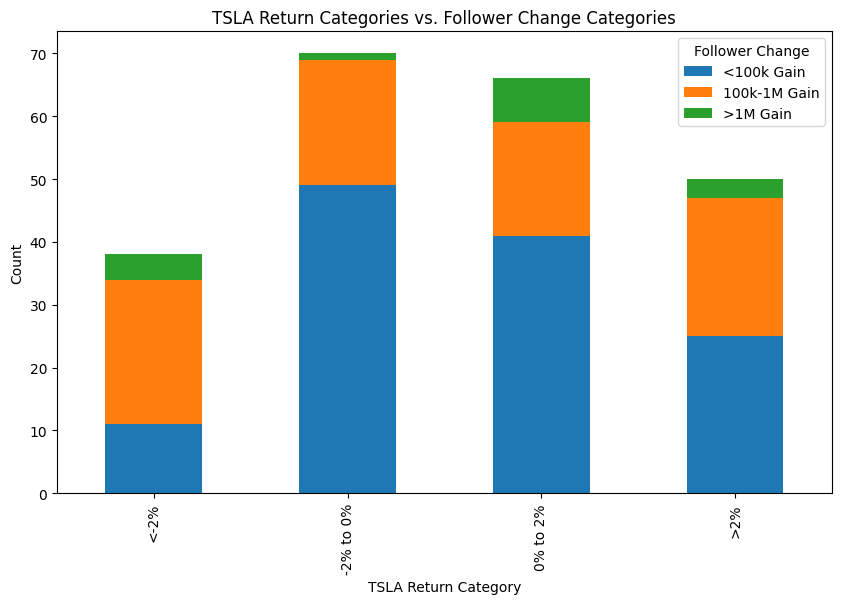

In [20]:
# create bins for TSLA_Return
final_merged_df['Return_Category'] = pd.cut(final_merged_df['TSLA_Return'], bins=[-np.inf, -2, 0, 2, np.inf], labels=['<-2%', '-2% to 0%', '0% to 2%', '>2%'])

# create bins for follower changes
final_merged_df['Follower_Category'] = pd.cut(final_merged_df['change_in_followers'], bins=[-np.inf, 0, 100000, 1000000, np.inf], labels=['Loss/No Change', '<100k Gain', '100k-1M Gain', '>1M Gain'])

# new contingency table
binned_table = pd.crosstab(final_merged_df['Return_Category'], final_merged_df['Follower_Category'])

# plot bar chart
binned_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('TSLA Return Categories vs. Follower Change Categories')
plt.xlabel('TSLA Return Category')
plt.ylabel('Count')
plt.legend(title='Follower Change')
plt.show()